# Student Performance Indicator

**Phases of a Machine Learning Project:**

1. **Understanding the Problem**: Define the project objectives and identify the key challenges.
1. **Data Collection**: Gather relevant and sufficient data from various sources.
1. **Data Validation**: Check for completeness, consistency, and accuracy of the collected data.
1. **Exploratory Data Analysis (EDA)**: Analyze data patterns, correlations, and trends to gain insights.
1. **Data Preprocessing**: Clean, normalize, and prepare data for model training.
1. **Model Training**: Develop machine learning models using the processed data.
1. **Model Selection**: Evaluate and choose the best-performing model for deployment.

**1. Understanding the Problem**
* This project aims to understand how student performance, measured by exam scores, is influenced by factors such as gender, ethnicity, parental education level, lunch type, and participation in test preparation courses.

**2. Data Collection**

* Data Source (Kaggle)


**2.1 Import Data and Required Packages**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Import the CSV data as pandas DataFrame**

In [3]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

**Show Top 5 Rows**

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [5]:
df.shape

(1000, 8)

**A quick overview of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**2.2 Dataset Metadata**
* Gender: sex of students -> (Male / Female)
* Race/Ethnicity: ethnicity of students ->(Group A,B,C,D,E)
* parental level of education : parents' highest education -> (bachelor's degree, some college, master's degree,associate's degree, high school, some high school)
* lunch: having lunch before test ( standard or free/reduced)
* test preparation course: complete or not complete before test
* math score
* reading score
* writing score

**3. Data Checks to perform**
1. **Check for Missing Values**: Identify any missing or null values in the dataset.
1.**Check for Duplicates**: Detect and remove any duplicate rows to ensure data integrity.
1. **Verify Data Types**: Ensure that each column has the correct data type (e.g., integers, floats, categorical).
1. **Check Unique Values**: Count the number of unique values in each column to understand data variability.
1. **Examine Dataset Statistics**: Generate summary statistics (e.g., mean, median, standard deviation) to understand the distribution of numerical columns.
1. **Analyze Categorical Columns**: List and analyze the different categories present in each categorical column.

**3.1 Check for Missing Values**

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**3.2 Check for duplicates**

In [9]:
df.duplicated().sum()

0

**3.3 Verify data types**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 Check Unique Values**

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

**3.5 Examine Dataset Statistics**

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights from the Dataset Statistics:**

**Close Means**: The mean scores for all subjects (math, reading, and writing) are quite similar, ranging between 66 and 69.1. This suggests that, on average, students perform similarly across these subjects.

**Consistent Standard Deviations**: The standard deviations for all subjects fall between 14.6 and 15.5, indicating a comparable spread in the distribution of scores across math, reading, and writing.

**Minimum Scores**: The minimum score for math is 0, while for reading and writing, the minimum scores are 14.6 and 15.1, respectively. This suggests that some students struggled significantly, particularly in math, where a score of zero is recorded.

**3.7 Analyze Categorical Columns**

In [13]:
print('Categories in [gender] variable:', end=" ")
print(df['gender'].unique())

print('Categories in [race/ethnicity] variable:', end=" ")
print(df['race/ethnicity'].unique())

print('Categories in [parental level of education] variable:', end=" ")
print(df['parental level of education'].unique())

print('Categories in [lunch] variable:', end=" ")
print(df['lunch'].unique())

print('Categories in [test preparation course] variable:', end=" ")
print(df['test preparation course'].unique())

Categories in [gender] variable: ['female' 'male']
Categories in [race/ethnicity] variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in [parental level of education] variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in [lunch] variable: ['standard' 'free/reduced']
Categories in [test preparation course] variable: ['none' 'completed']


**Numberical & Categorical Features**

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


**3.8 Adding columns for 'Total score' and 'Average'**

In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] /3


In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100]['reading score'].count()
math_full = df[df['math score'] == 100]['math score'].count()
writing_full = df[df['writing score'] == 100]['writing score'].count()

print(f"Number of stuents with full mark in Maths : {math_full}")
print(f"Number of stuents with full mark in Reading : {reading_full}")
print(f"Number of stuents with full mark in Writing : {writing_full}")

Number of stuents with full mark in Maths : 7
Number of stuents with full mark in Reading : 17
Number of stuents with full mark in Writing : 14


In [19]:
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
math_less_20 = df[df['math score'] <= 20]['math score'].count()
writing_less_20 = df[df['writing score'] <= 20]['writing score'].count()

print(f"Number of stuents with mark less than 20 in Maths : {math_less_20}")
print(f"Number of stuents with mark less than 20 in Reading : {reading_less_20}")
print(f"Number of stuents with mark less than 20 in Writing : {writing_less_20}")

Number of stuents with mark less than 20 in Maths : 4
Number of stuents with mark less than 20 in Reading : 1
Number of stuents with mark less than 20 in Writing : 3


From the above values we realize that students performed worst in Math and Best in Reading

**4 Exploratory Data Analysis (EDA)**

**4.1 Visualize average score distribution to make some conslucion**


**4.1.1 Histogram & KDE**

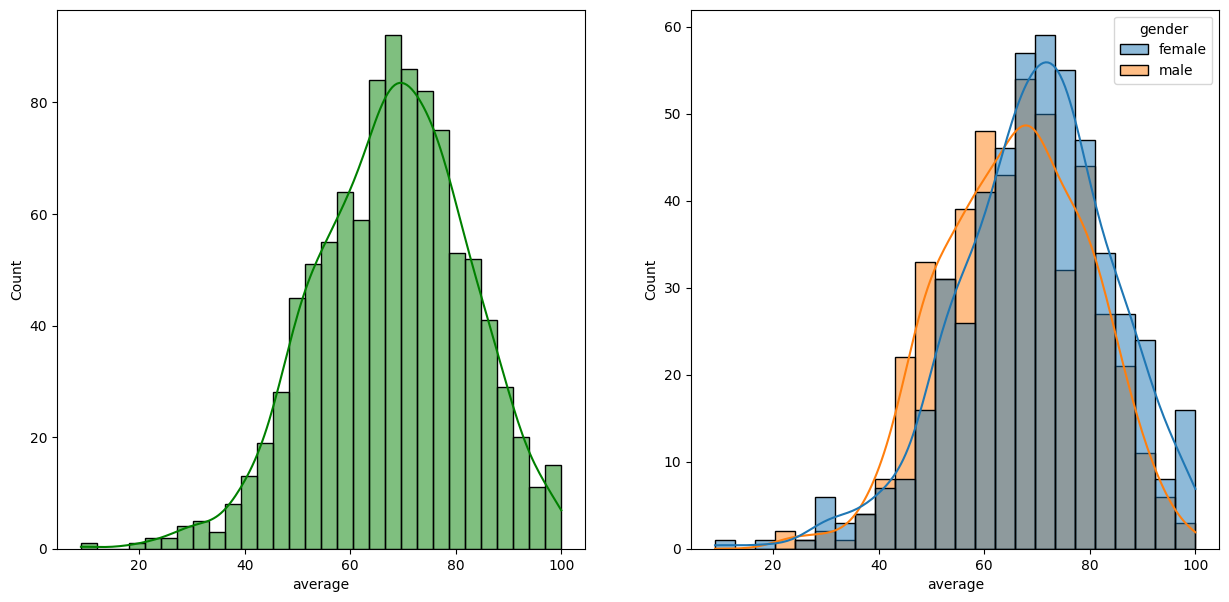

In [20]:
# distribution of students wrt average
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

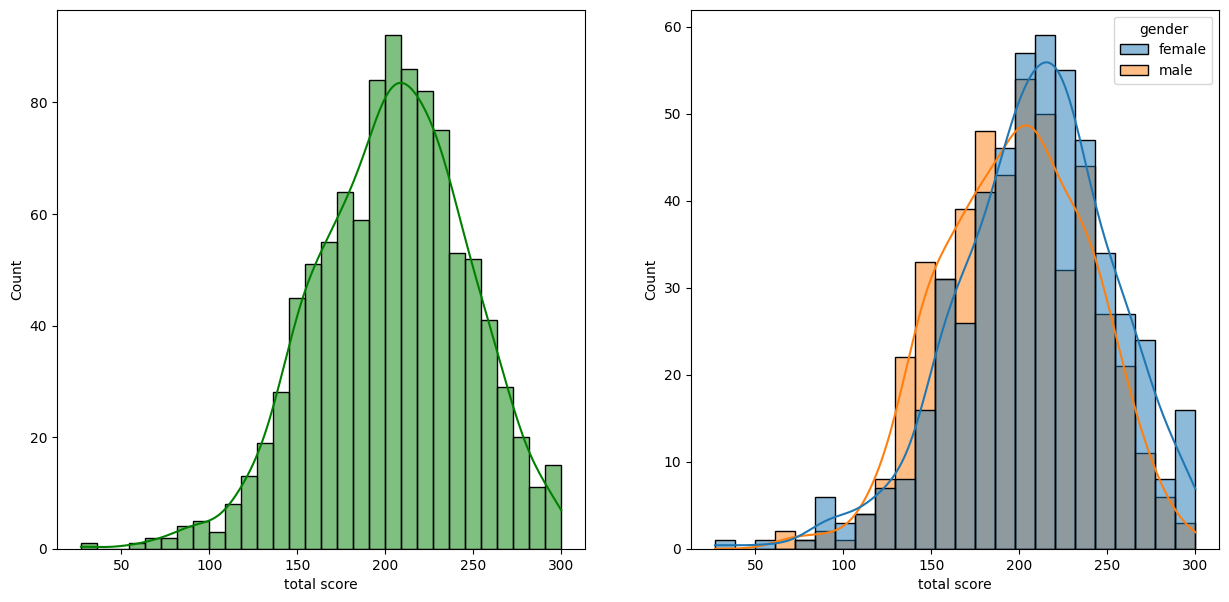

In [21]:
# distribution of students wrt total score
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

**Insight on Gender Performance:**

Female students outperform male students in both average and total scores across all subjects. This indicates that, on average, female students tend to achieve higher test scores compared to their male counterparts.

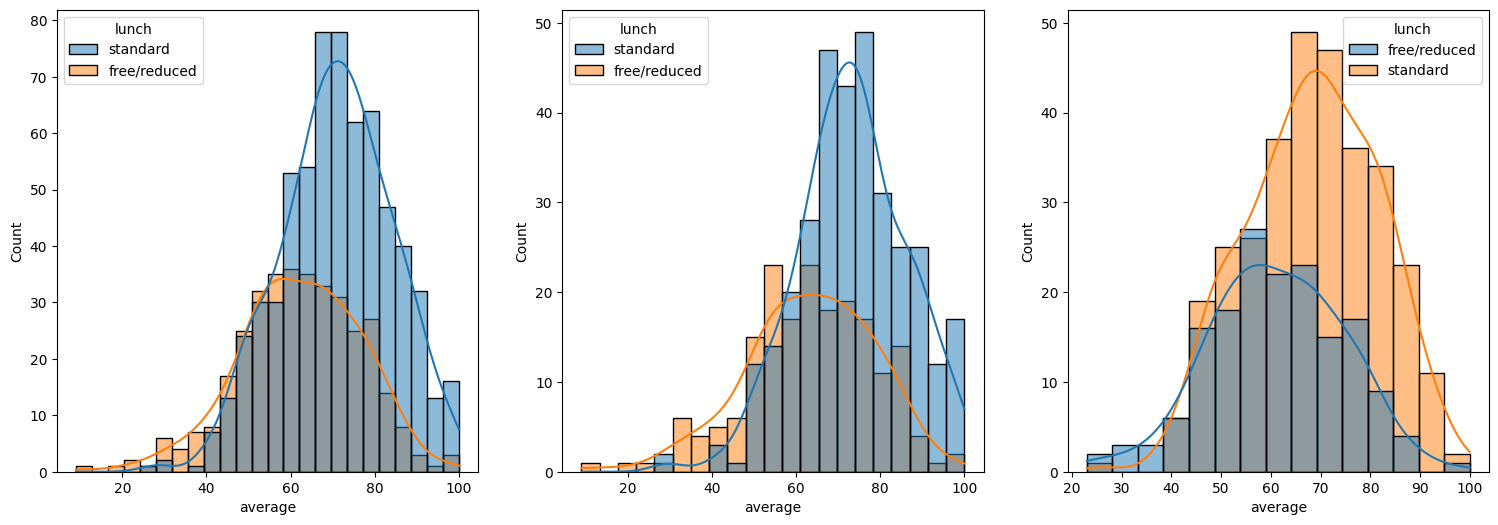

In [22]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde= True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data= df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

**Insight on Lunch Type and Performance:**

* Students who receive a standard lunch tend to perform better in exams compared to those with free or reduced lunch.
* The positive impact of a standard lunch on exam performance is consistent across both genders, indicating it benefits all students equally.

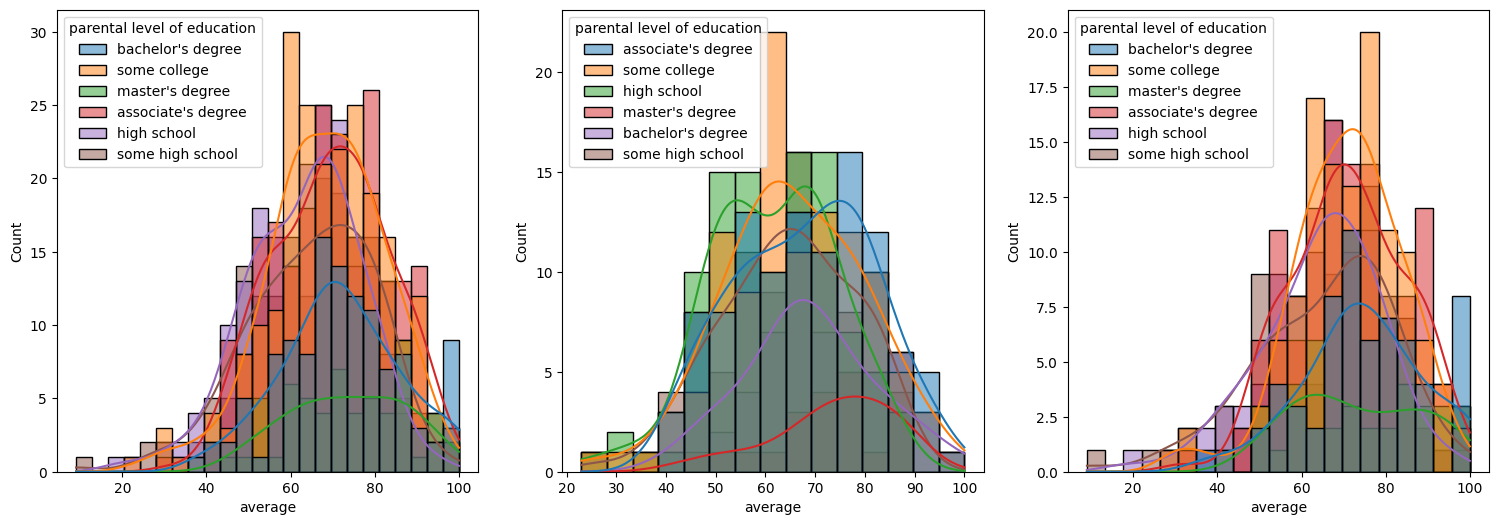

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x = 'average', kde = True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde = True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x = 'average', kde = True, hue='parental level of education')
plt.show()

**Insights on Parental Education and Student Performance:**

* In general, a parent's education level does not significantly impact a student's performance in exams.
* However, the second plot shows that male students whose parents hold an associate's or master's degree tend to perform better in exams.
* The third plot reveals that parental education has no noticeable effect on the exam performance of female students.

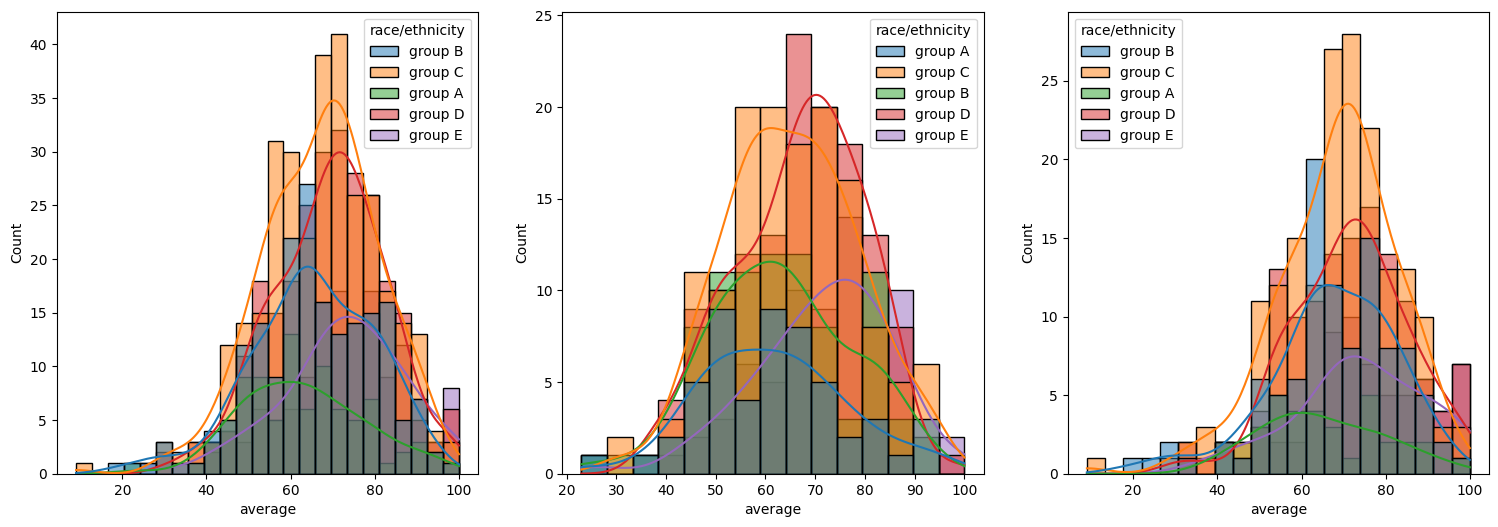

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x = 'average', kde = True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'male'], x = 'average', kde = True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'female'], x = 'average', kde = True, hue='race/ethnicity')
plt.show()

**Insights on Group Performance:**
* Students in Group A and Group B generally perform poorly in exams.
* This trend of underperformance is consistent for both male and female students in these groups, indicating that gender does not influence their exam results.

**4.2 Maximumum score of students in all three subjects**

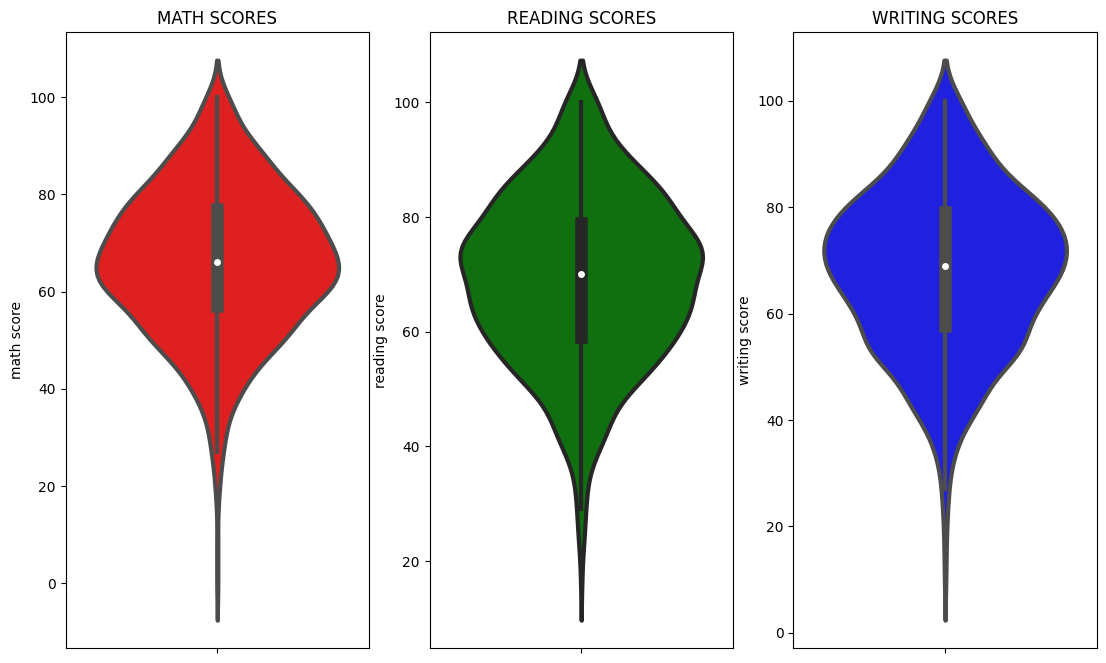

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

**Insights on Score Distribution:**
* The above three plots clearly show that most students score between 60 and 80 in math.
* In contrast, for reading and writing, the majority of students score between 50 and 80, indicating a slightly lower average performance in these subjects compared to math.

**4.3 Multivariate analysis using pieplot**


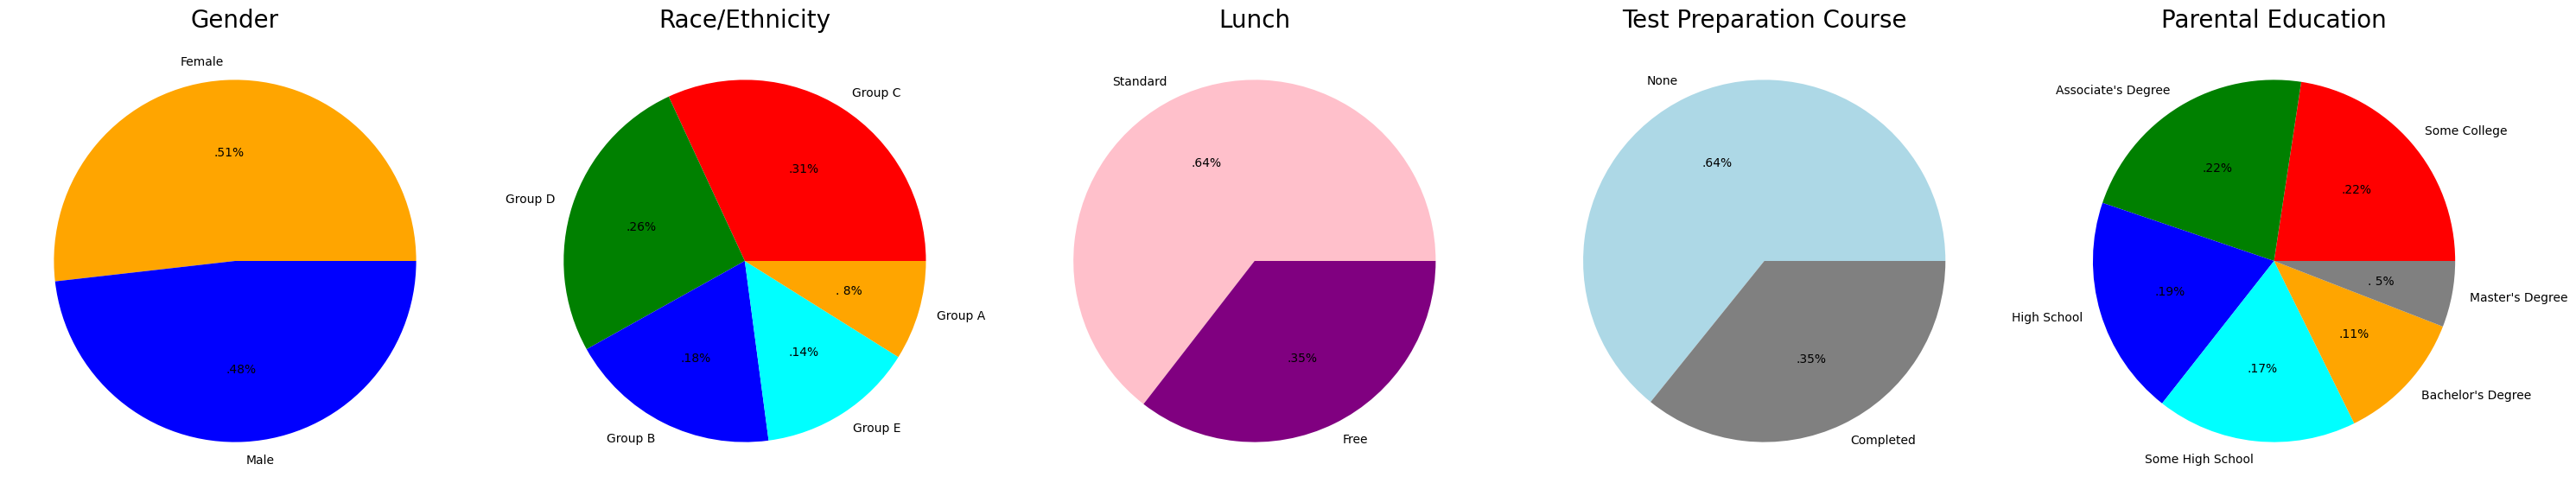

In [26]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['orange','blue']

plt.pie(size, colors=color, labels = labels, autopct = '.%2d%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
colors = ['red','green','blue','cyan','orange']

plt.pie(size, colors = colors, labels = labels, autopct = '.%2d%%')
plt.title('Race/Ethnicity', fontsize = 20)

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
colors = ['pink','purple']

plt.pie(size, colors = colors, labels = labels, autopct = '.%2d%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
colors = ['lightblue','grey']

plt.pie(size, colors = colors, labels = labels, autopct = '.%2d%%')
plt.title('Test Preparation Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2d%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.show()

**Insights on Student Demographics:**
* The number of male and female students is nearly equal.
* Group C has the highest number of students among the different groups.
* There is a larger number of students who receive a standard lunch.
* More students have not enrolled in any test preparation course compared to those who have.
* The majority of students come from households where the parental education level is "Some College," closely followed by those with an "Associate's Degree."

**4.4 Feature Wise Visualization**

**4.4.1 GENDER COLUMN**
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( How is distribution of Gender ? )**

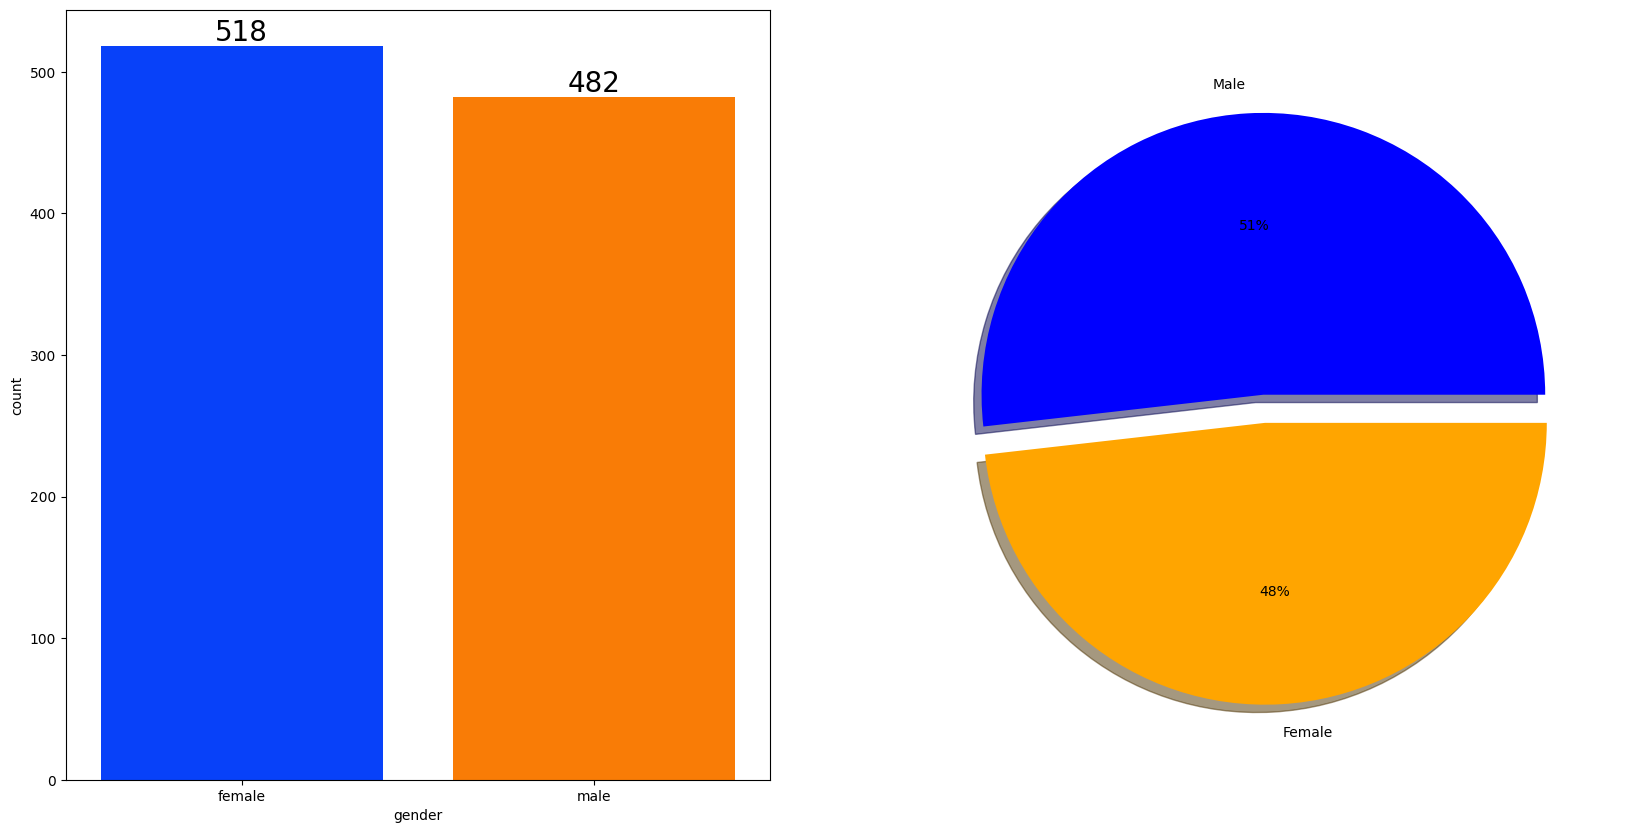

In [27]:
fig,ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(),labels= ['Male', 'Female'],colors=['blue','orange'],explode=[0,0.1], autopct='%2d%%', shadow=True)  
plt.show()

**Insights on Gender Distribution:**
* The dataset shows a balanced distribution of gender, with 518 female students (48%) and 482 male students (52%).


**Bivariate Analysis: Impact of Gender on Student Performance**

In [28]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


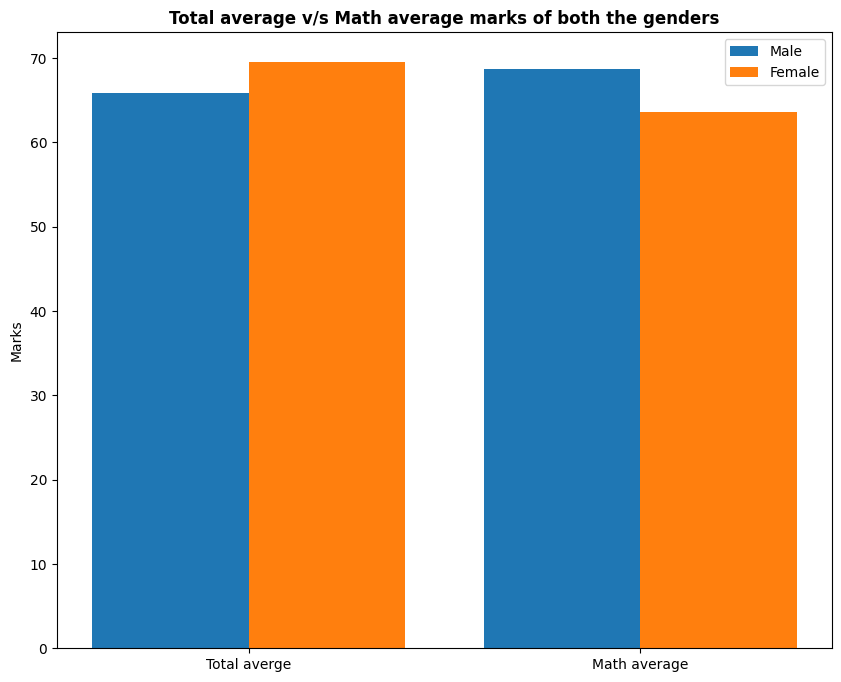

In [29]:
plt.figure(figsize=(10,8))
x = ['Total averge','Math average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

x_axis = np.arange(len(x))

plt.bar(x_axis-0.2, male_scores, 0.4, label = 'Male')
plt.bar(x_axis+0.2, female_scores, 0.4, label='Female',)

plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')
plt.legend()
plt.show()

**Insights**
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

**4.4.2 RACE/EHNICITY COLUMN**

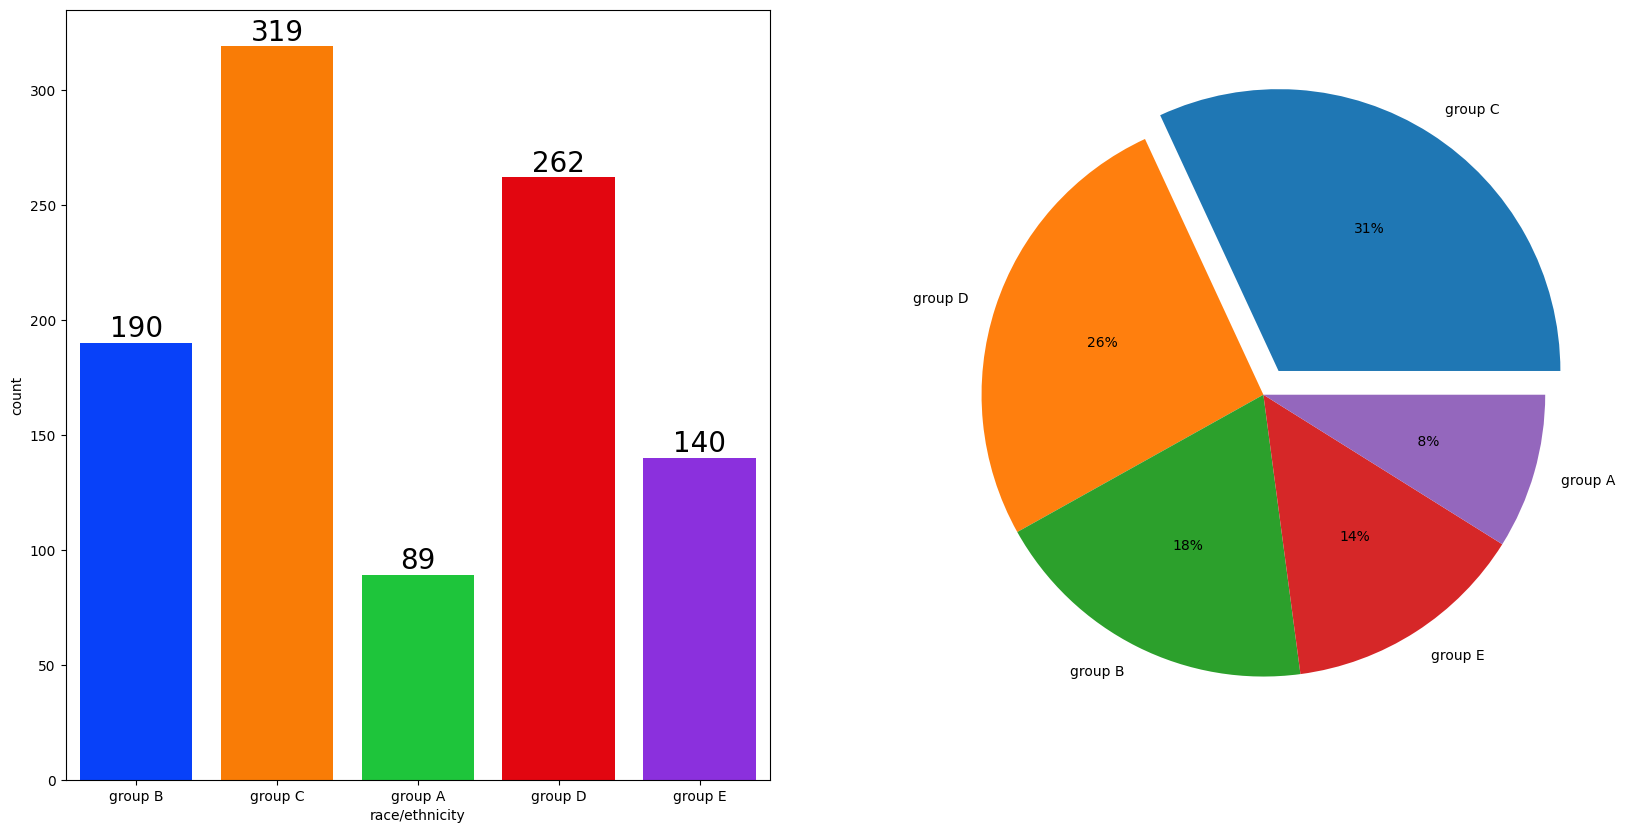

In [30]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(data= df, x=df['race/ethnicity'],palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0,0,0,0],autopct='%2d%%')    
plt.show()

**Insight**
* Most of the students belong to group C and group D ethnicity
* Group A ethnicity has the the lowest student.



**4.4.2 RACE/EHNICITY COLUMN**
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

In [31]:
race_group = df.groupby('race/ethnicity')
race_group['math score'].mean().index

Index(['group A', 'group B', 'group C', 'group D', 'group E'], dtype='object', name='race/ethnicity')

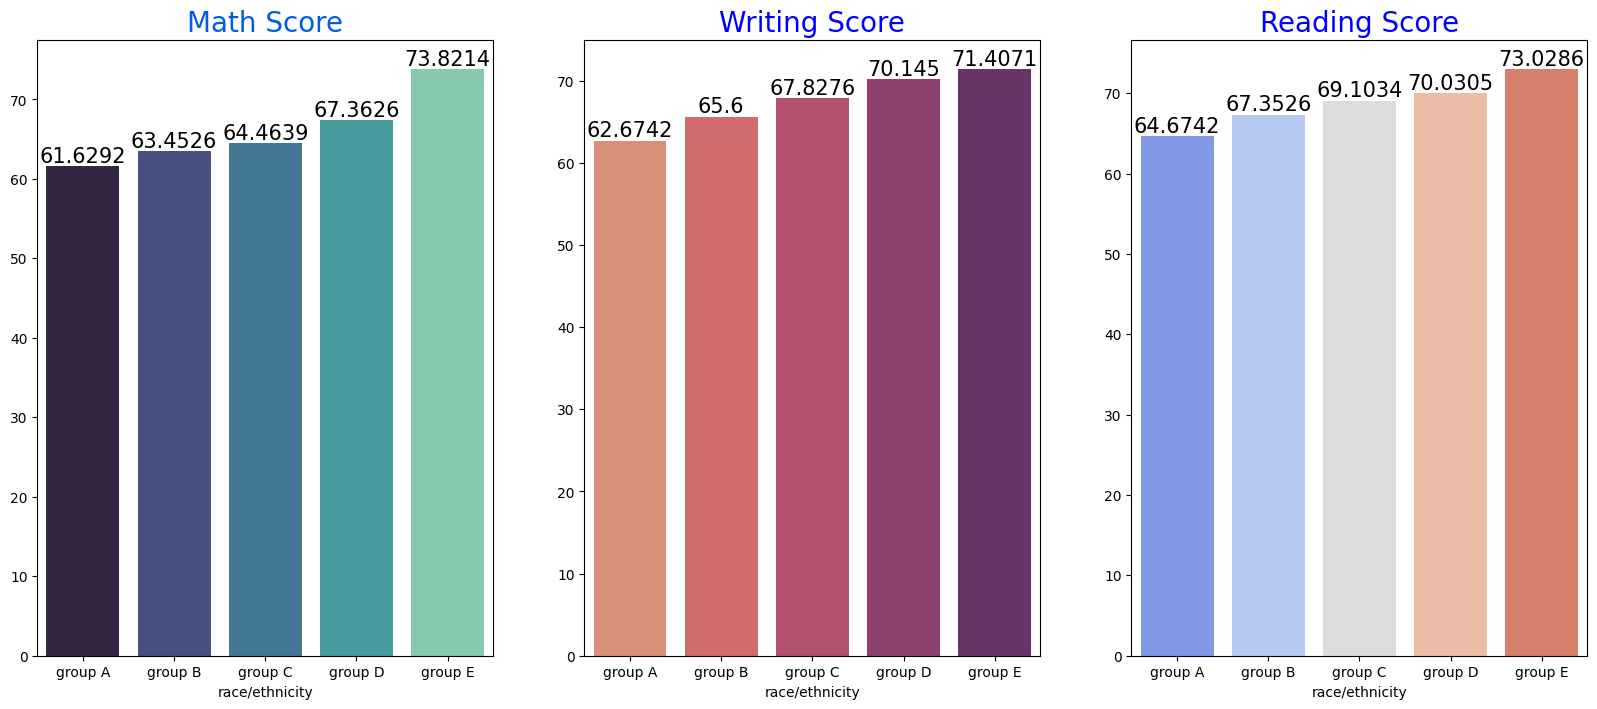

In [32]:
race_group = df.groupby('race/ethnicity')
fig, ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=race_group['math score'].mean().index, y=race_group['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)
    
sns.barplot(x=race_group['writing score'].mean().index, y=race_group['writing score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Writing Score', color='blue', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)
    
sns.barplot(x=race_group['reading score'].mean().index, y=race_group['reading score'].mean().values, palette='coolwarm', ax=ax[2])    
ax[2].set_title('Reading Score', color='blue', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

**Insights on Race and Socioeconomic Status:**
* Students from Group E have the highest average scores in all subjects (math, writing, and reading).
* Conversely, students from Group A have the lowest average scores among all race groups.
* Students from lower socioeconomic backgrounds exhibit lower average scores across all subjects, indicating a correlation between socioeconomic status and academic performance.

**4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN**
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

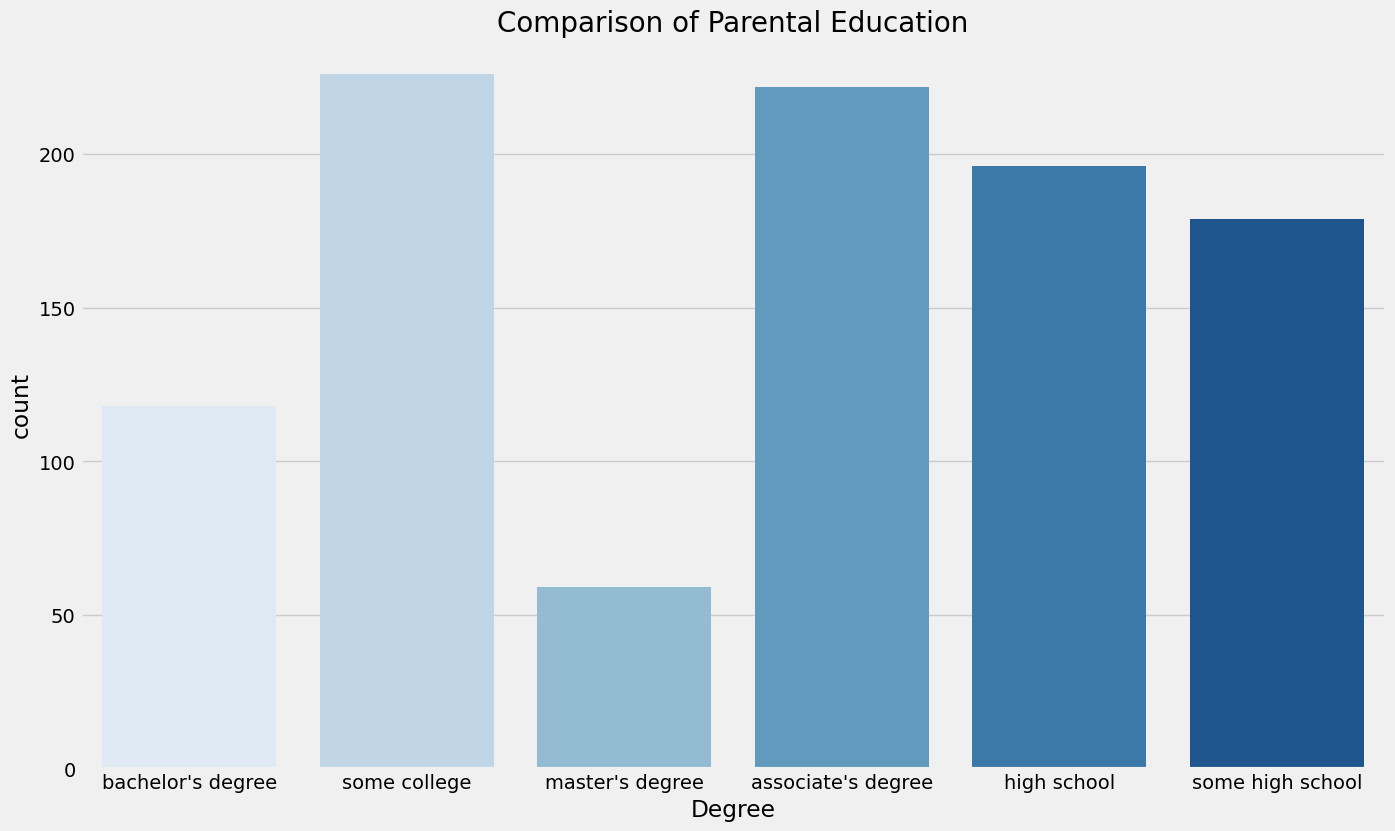

In [33]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Insights**
* Majority of parents are from some college

In [34]:
parent_group = df.groupby('parental level of education')

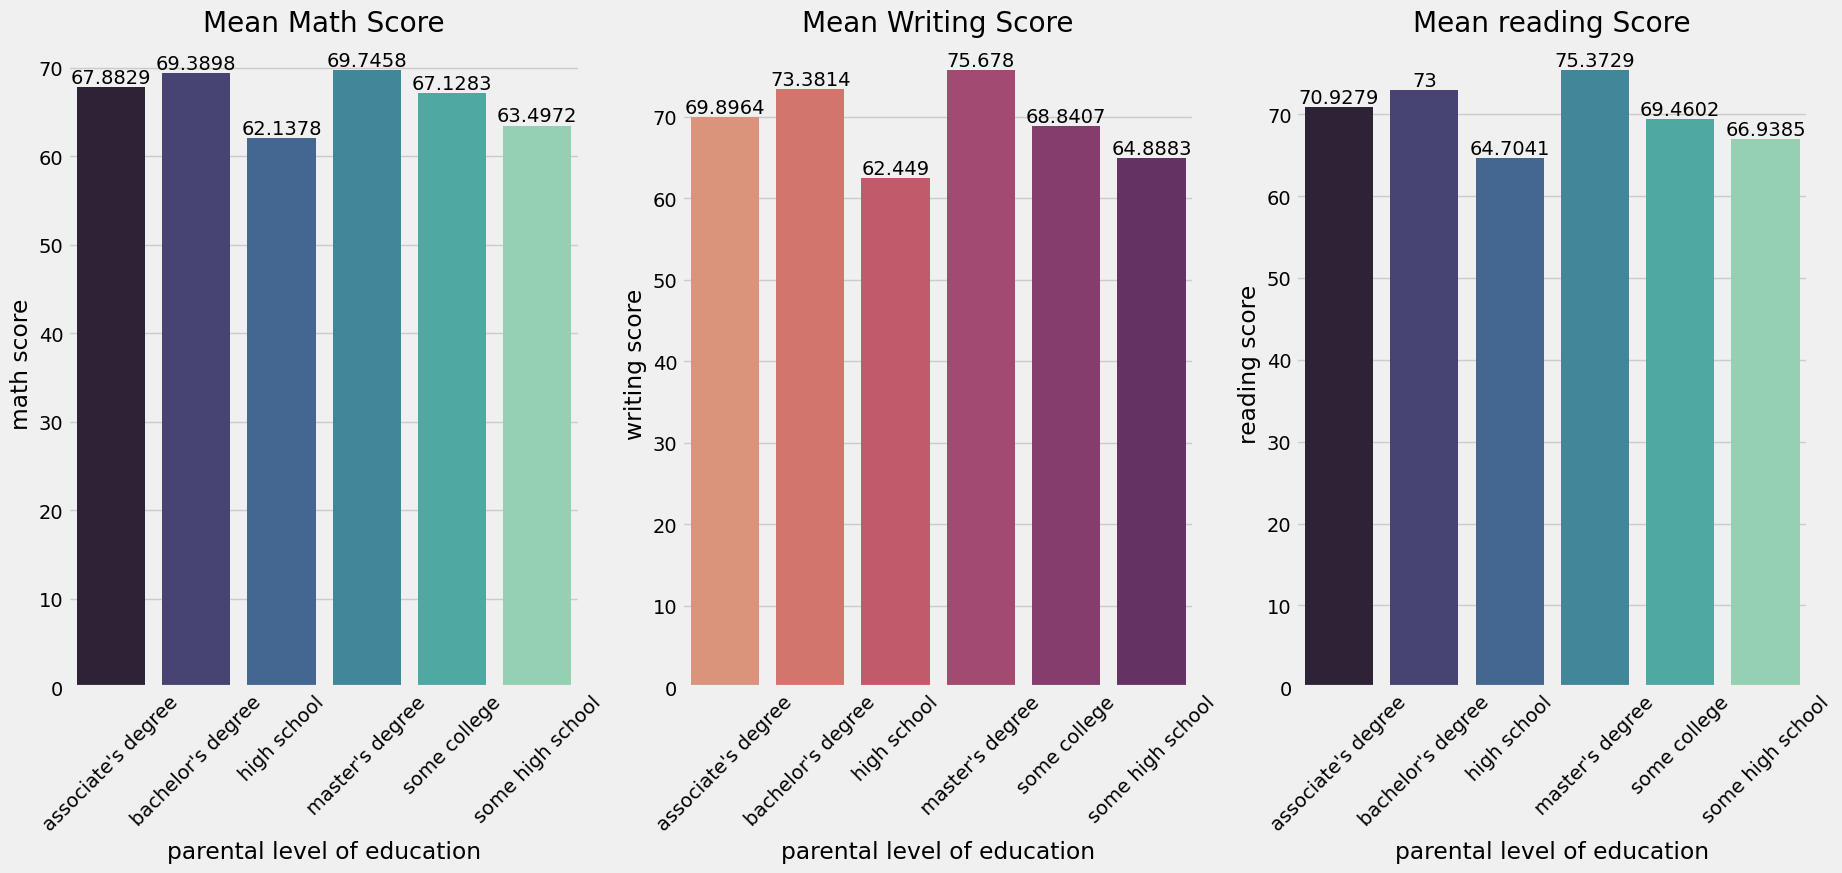

In [35]:
fig,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x='parental level of education', y='math score', data = parent_group['math score'].mean().reset_index(), palette='mako',ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('Mean Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')

sns.barplot(x='parental level of education', y='writing score', data = parent_group['writing score'].mean().reset_index(), palette='flare',ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45) 
ax[1].set_title('Mean Writing Score')
for container in ax[1].containers:
    ax[1].bar_label(container, color='black')    

sns.barplot(x='parental level of education', y='reading score', data = parent_group['reading score'].mean().reset_index(), palette='mako',ax=ax[2])
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)  
ax[2].set_title('Mean reading Score')
for container in ax[2].containers:
    ax[2].bar_label(container, color='black')

**Insights**
* Students whose parents are holding master's or bachelor's degree score higher than others

**4.4.4 LUNCH COLUMN**
* What types of lunch is commanly taken by students
* What is the impact of lunch of test scores

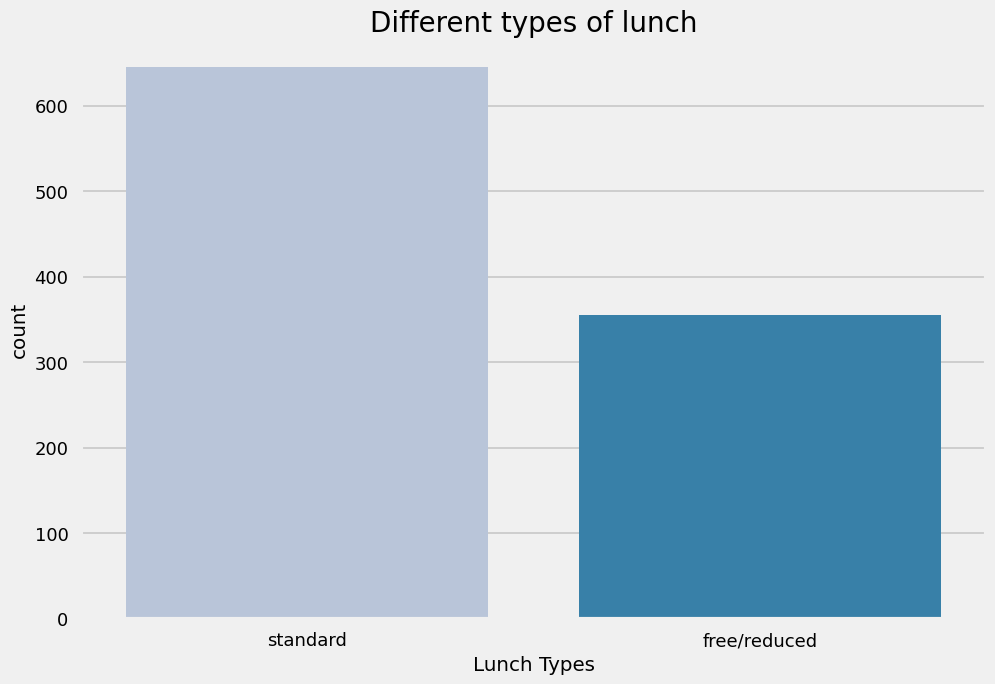

In [36]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x='lunch',data=df,palette='PuBu')
plt.title('Different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Lunch Types')
plt.ylabel('count')
plt.show()

**Insight**
* Students who took standard lunch are double the number of free/reduced lunch. 

**Bivariate Analysis( Effect of lunch on students performance)**

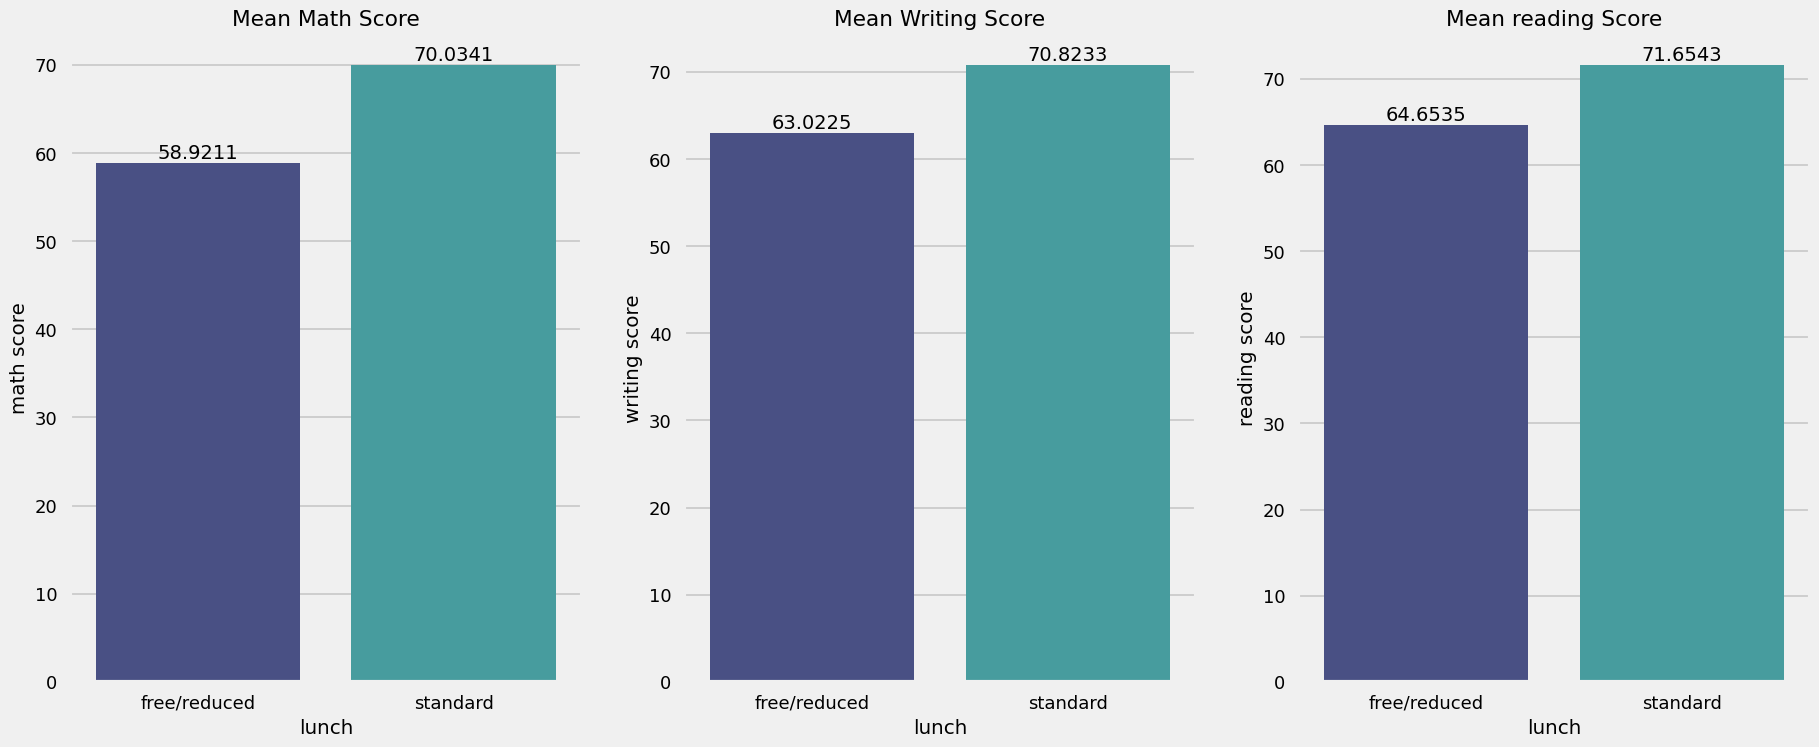

In [37]:
fig,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x='lunch', y='math score', data = df.groupby('lunch')['math score'].mean().reset_index(), palette='mako',ax=ax[0])
ax[0].set_title('Mean Math Score')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black')

sns.barplot(x='lunch', y='writing score', data = df.groupby('lunch')['writing score'].mean().reset_index(), palette='mako',ax=ax[1])
ax[1].set_title('Mean Writing Score')
for container in ax[1].containers:
    ax[1].bar_label(container, color='black')    
    
sns.barplot(x='lunch', y='reading score', data = df.groupby('lunch')['reading score'].mean().reset_index(), palette='mako',ax=ax[2])
ax[2].set_title('Mean reading Score')
for container in ax[2].containers:
    ax[2].bar_label(container, color='black')    
    

<Axes: xlabel='test preparation course', ylabel='writing score'>

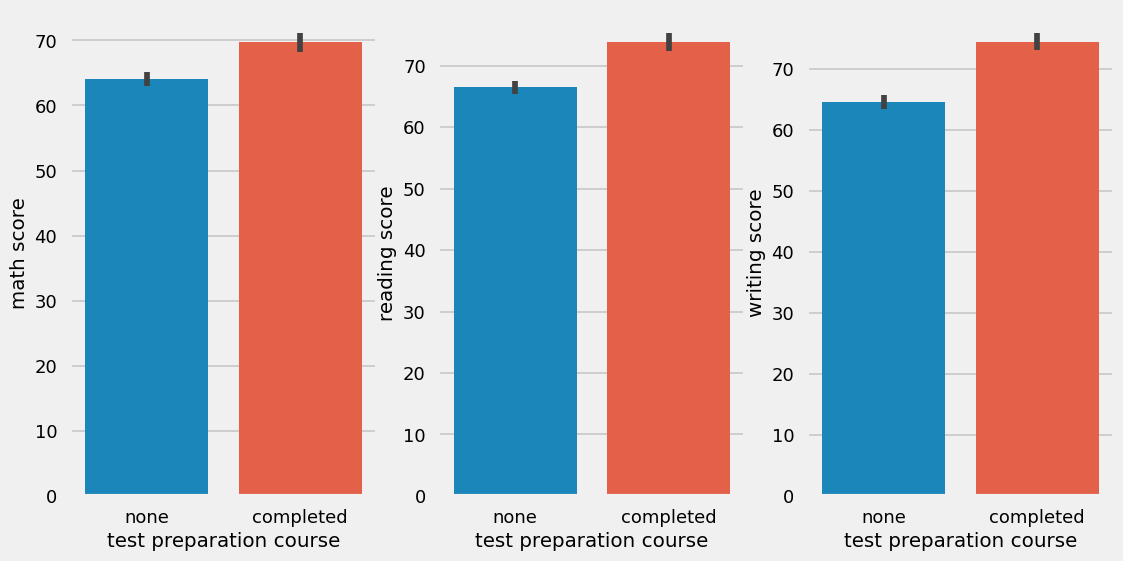

In [38]:
fig, ax = plt.subplots(1,3,figsize=(12,6))
sns.barplot (x=df['test preparation course'], y=df['math score'], ax=ax[0])

sns.barplot (x=df['test preparation course'], y=df['reading score'], ax=ax[1])

sns.barplot (x=df['test preparation course'], y=df['writing score'], ax=ax[2])

**Insights**
* All students who completed test preparation course have scored higher in all math, reading and writing test.

**Checking Outliers**

<Axes: xlabel='average'>

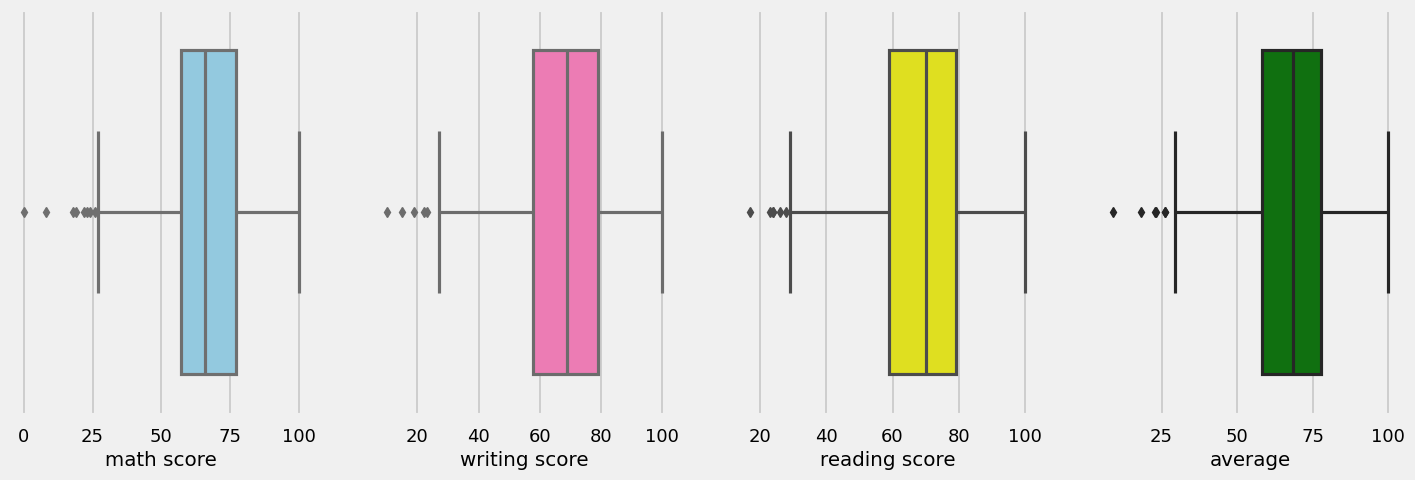

In [53]:
fig, ax = plt.subplots(1,4, figsize=(16,5,))
sns.boxplot(data=df, x='math score', color='skyblue',ax=ax[0])
sns.boxplot(data=df, x='writing score', color='hotpink',ax=ax[1])
sns.boxplot(data=df, x='reading score', color='yellow',ax=ax[2])
sns.boxplot(data=df, x='average', color='green',ax=ax[3])

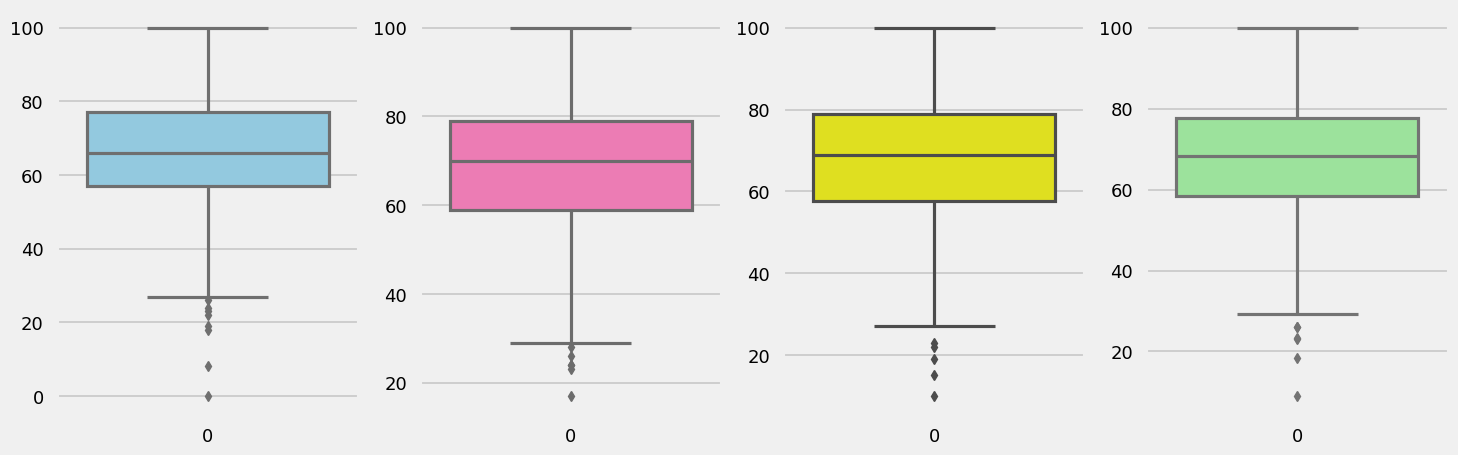

In [51]:
	
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

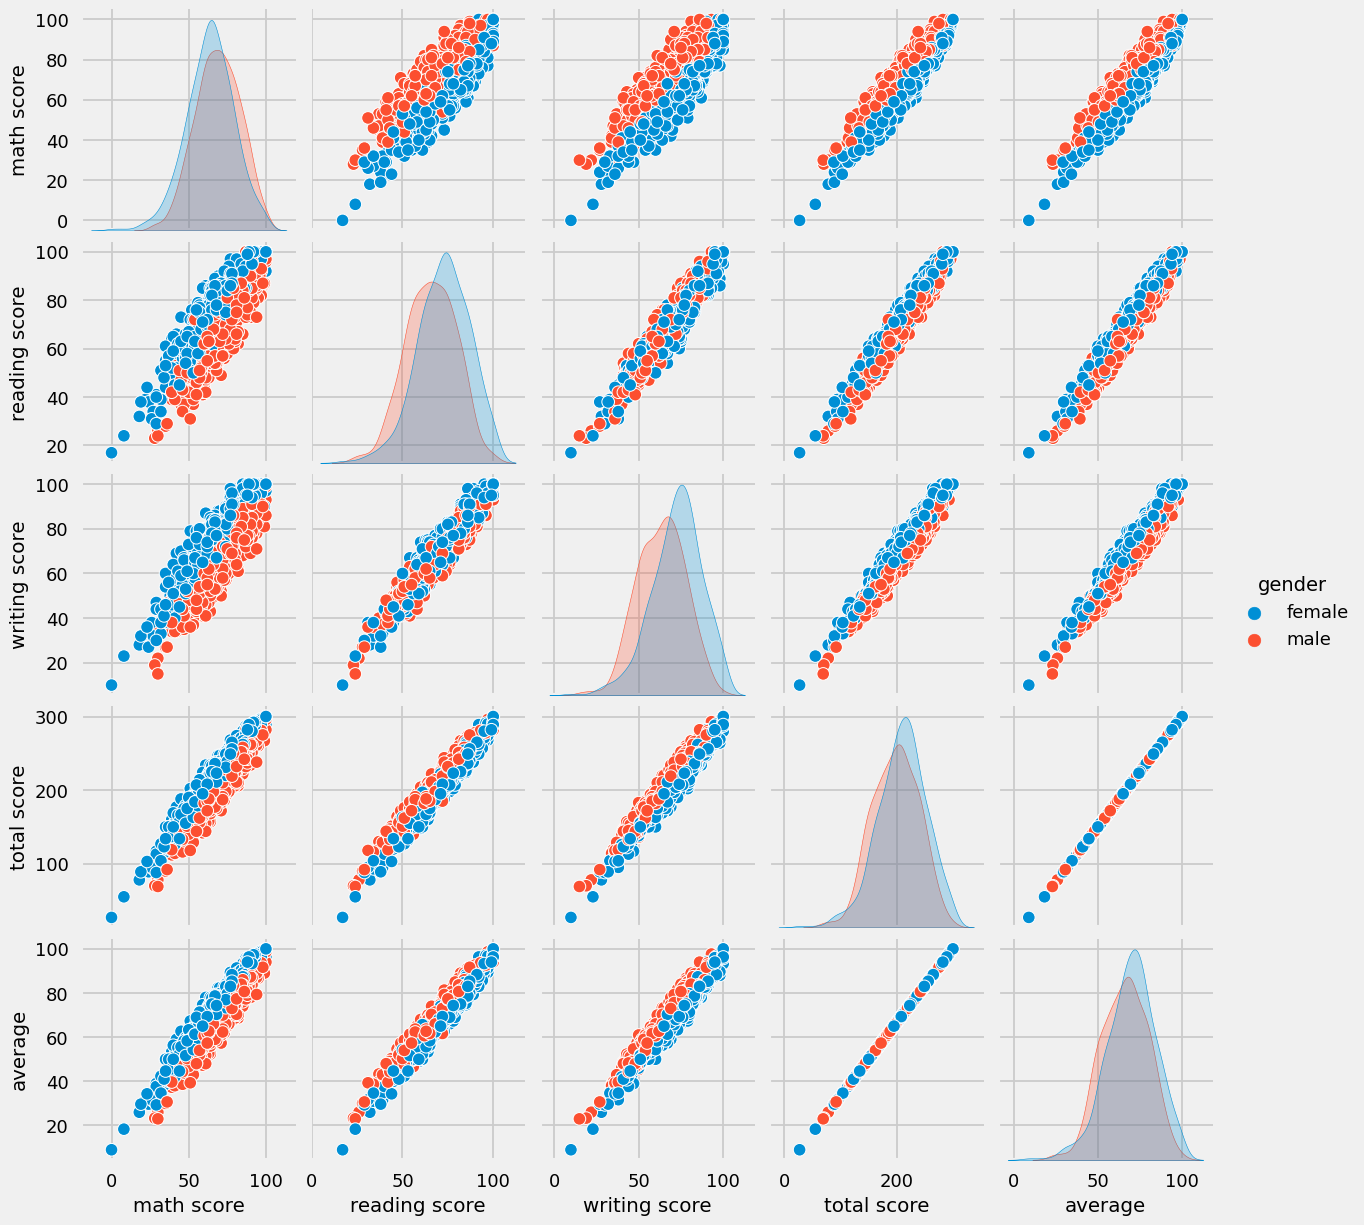

In [55]:

sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**
* From the above plot it is clear that all the scores increase linearly with each other.

**Takeaways:**
* Student performance is influenced by factors such as lunch type, race, and parental education level.
* Female students not only lead in pass percentages but also rank as the top scorers in exams.
* There is little correlation between performance and enrollment in test preparation courses, suggesting that merely enrolling may not significantly impact scores.
* Completing a test preparation course proves beneficial, as it likely contributes to improved performance.